### Context
Eclipses of the sun can only occur when the moon is near one of its two orbital nodes during the new moon phase. It is then possible for the Moon's penumbral, umbral, or antumbral shadows to sweep across Earth's surface thereby producing an eclipse.<br>
There are four types of solar eclipses: <br>
1.<i> a partial eclipse, during which the moon's penumbral shadow traverses Earth and umbral and antumbral shadows completely miss Earth; <br>2. an annular eclipse, during which the moon's antumbral shadow traverses Earth but does not completely cover the sun; <br>3. a total eclipse, during which the moon's umbral shadow traverses Earth and completely covers the sun; <br>4. and a hybrid eclipse, during which the moon's umbral and antumbral shadows traverse Earth and annular and total eclipses are visible in different locations. <br> </i>
Earth will experience 11898 solar eclipses during the five millennium period -1999 to +3000 (2000 BCE to 3000 CE).<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import descartes

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#To view all the columns of the dataframe
pd.set_option('display.max_columns',20)

In [5]:
#Importing the solar eclipse dataset into solar_df
solar_df = pd.read_csv('./solar.csv')

In [6]:
#Viewing the dataset head
solar_df.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [7]:
solar_df.shape

(11898, 15)

We can see that the solar dataset consist of 15 features and 11898 rows.

In [8]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 15 columns):
Catalog Number       11898 non-null int64
Calendar Date        11898 non-null object
Eclipse Time         11898 non-null object
Delta T (s)          11898 non-null int64
Lunation Number      11898 non-null int64
Saros Number         11898 non-null int64
Eclipse Type         11898 non-null object
Gamma                11898 non-null float64
Eclipse Magnitude    11898 non-null float64
Latitude             11898 non-null object
Longitude            11898 non-null object
Sun Altitude         11898 non-null int64
Sun Azimuth          11898 non-null int64
Path Width (km)      7698 non-null object
Central Duration     7698 non-null object
dtypes: float64(2), int64(6), object(7)
memory usage: 1.4+ MB


From the initial info, we can see that many of the columns are numerical features except a few like Latitude and Longitude which would be having the direction mentioned alongwith the coordinates and Eclipse Date,time which needs to be converted into date time fields. <br>
We can also see there are some NULL values present in some of the columns such as `Central Duration` and `Path Width`.

In [9]:
#What the initial statistics say?
solar_df.describe()

,Catalog Number,Delta T (s),Lunation Number,Saros Number,Gamma,Eclipse Magnitude,Sun Altitude,Sun Azimuth
count,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000
mean,5949.500000,12142.172802,-18546.959321,87.483190,-0.002469,0.812748,36.505295,180.264330
std,3434.801086,13583.402888,17906.572982,48.380284,0.900860,0.300398,32.417350,110.745408
min,1.000000,-6.000000,-49456.000000,-13.000000,-1.569000,0.000000,0.000000,0.000000
25%,2975.250000,970.250000,-33954.750000,47.000000,-0.786575,0.675925,0.000000,89.000000
50%,5949.500000,5636.500000,-18495.000000,87.000000,-0.003850,0.950600,38.000000,180.000000
75%,8923.750000,20943.500000,-3039.250000,128.000000,0.776900,1.018400,66.000000,272.000000
max,11898.000000,46438.000000,12378.000000,190.000000,1.570600,1.081300,90.000000,360.000000


#### EDA

#### Delta T

The orbital positions of the Sun and Moon required by eclipse predictions, are calculated using Terrestrial Dynamical Time (TD) because it is a uniform time scale. However, world time zones and daily life are based on Universal Time(UT). In order to convert eclipse predictions from TD to UT, the difference between these two time scales must be known. The parameter <b>delta-T (ΔT)</b> is the arithmetic difference, in seconds, between the two as: <br>
                              ΔT = TD - UT <br>
Here we can see the maximum delta T to be 46438 seconds.

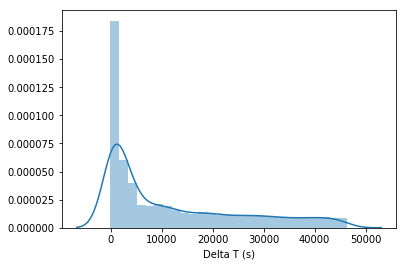

In [10]:
sns.distplot(solar_df['Delta T (s)'])

In [11]:
solar_df.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


#### Saros Number

The <b>saros</b> (/ˈsɛərɒs/ (About this soundlisten)) is a period of exactly 223 synodic months (approximately 6585.3211 days, or 18 years, 11 days, 8 hours), that can be used to predict eclipses of the Sun and Moon. One saros period after an eclipse, the Sun, Earth, and Moon return to approximately the same relative geometry, a near straight line, and a nearly identical eclipse will occur, in what is referred to as an eclipse cycle. A sar is one half of a saros.

Each saros series starts with a partial eclipse (Sun first enters the end of the node), and each successive saros the path of the Moon is shifted either northward (when near the descending node) or southward (when near the ascending node) due to the fact that the saros is not an exact integer of draconic months (about one hour short). <br>
Saros series, as mentioned, are numbered according to the type of eclipse (lunar or solar).<br>In odd numbered series (for solar eclipses) the Sun is near the ascending node, whereas in even numbered series it is near the descending node (this is reversed for lunar eclipse saros series).<br>Generally, the ordering of these series determines the time at which each series peaks, which corresponds to when an eclipse is closest to one of the lunar nodes. For solar eclipses, the 40 series numbered between 117 and 156 are active (series 117 will end in 2054)

In [12]:
from collections import Counter
Counter(solar_df['Saros Number'].sort_values(ascending=False))

Counter({190: 1,
         189: 5,
         188: 7,
         187: 8,
         186: 12,
         185: 14,
         184: 12,
         183: 19,
         182: 18,
         181: 9,
         180: 14,
         179: 15,
         178: 15,
         177: 20,
         176: 22,
         175: 23,
         174: 26,
         173: 29,
         172: 30,
         171: 34,
         170: 37,
         169: 38,
         168: 42,
         167: 45,
         166: 43,
         165: 48,
         164: 51,
         163: 40,
         162: 42,
         161: 46,
         160: 46,
         159: 49,
         158: 52,
         157: 53,
         156: 55,
         155: 60,
         154: 61,
         153: 63,
         152: 67,
         151: 68,
         150: 71,
         149: 71,
         148: 75,
         147: 77,
         146: 76,
         145: 76,
         144: 70,
         143: 72,
         142: 72,
         141: 70,
         140: 71,
         139: 71,
         138: 70,
         137: 70,
         136: 71,
         135: 7

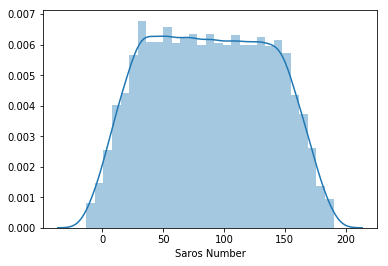

In [13]:
sns.distplot(solar_df['Saros Number'])

We can see that the Saros number is not exactly normally distributed but distributed across numbers spanning from -13 to 190.

We know that Saros Number 1 indicates that the same eclipse will repeat exactly after 223 synodic months or in other terms 18 years, 11 days, 8 hours. We can see that there are around 23 such instances of Saros 1 Solar Eclipses that happened in our dataset or in the last 5000 years.

#### Gamma

<b>Gamma (denoted as γ) </b> of an eclipse describes how centrally the shadow of the Moon or Earth strikes the other body. This distance, measured at the moment when the axis of the shadow cone passes closest to the center of the Earth or Moon, is stated as a fraction of the equatorial radius of the Earth or Moon.

#### Eclipse of Magnitude

The <b>magnitude of eclipse</b> is the fraction of the angular diameter of a celestial body being eclipsed.[1] This applies to all celestial eclipses. The magnitude of a partial or annular solar eclipse is always between 0.0 and 1.0, while the magnitude of a total solar eclipse is always greater than or equal to 1.0. <br>
Eclipse magnitude is the fraction of the Sun’s diameter occulted by the Moon. It is strictly a ratio of diameters and should not be confused with eclipse obscuration, which is a measure of the Sun’s surface area occulted by the Moon.

We can now see relation between the Gamma and Eclipse of Magnitude

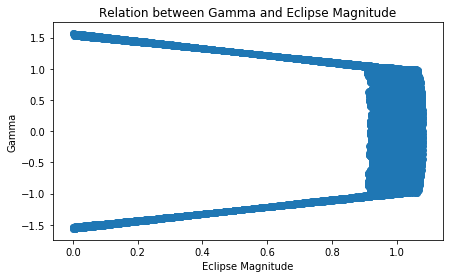

In [14]:
plt.figure(figsize=(7,4))
plt.scatter(y='Gamma',x='Eclipse Magnitude',data=solar_df)
plt.title('Relation between Gamma and Eclipse Magnitude')
plt.xlabel('Eclipse Magnitude')
plt.ylabel('Gamma')
plt.show()

We can find an interesting pattern here between the Gamma and Eclipse Magnitude.
Gamma as we know,is the distance of the Moon’s shadow axis from Earth’s center in units of equatorial Earth radii.

<b> We can find from above that, the magnitude of Eclipse is maximum when the absolute value of Gamma is near to Zero or maybe in range of 1 to -1. <br>In other ways, we can say fraction of the Sun’s diameter occulted by the Moon is maximum when distance of the Moon’s shadow axis from Earth’s center in units of equatorial Earth radii is at minimum.

We also know that the Eclipse Magnitude is equal to or more than 1, whenever the eclipse is a total eclipse. So the above plot further indicates the connection between Gamma and when total eclipse occurs.

#### Solar Types

We can know find out the total number of occurences for each type of Solar Eclipse in our dataset.

In [15]:
Counter(solar_df['Eclipse Type'])

Counter({'T': 3049,
         'A': 3755,
         'P': 3875,
         'Pb': 163,
         'H': 502,
         'Pe': 162,
         'A+': 34,
         'H3': 26,
         'Hm': 17,
         'An': 36,
         'H2': 24,
         'Tm': 72,
         'Am': 72,
         'T+': 9,
         'A-': 34,
         'T-': 17,
         'As': 25,
         'Tn': 14,
         'Ts': 12})

We know the 4 main Eclipse Types - `Total,Annual,Partial and Hybrid`.

Partial - Moon's penumbral shadow traverses Earth (umbral and antumbral shadows completely miss Earth) <br>
Annular - Moon's antumbral shadow traverses Earth (Moon is too far from Earth to completely cover the Sun)<br>
Total - Moon's umbral shadow traverses Earth (Moon is close enough to Earth to completely cover the Sun)<br>
Hybrid - Moon's umbral and antumbral shadows traverse Earth (eclipse appears annular and total along different sections of its path). Hybrid eclipses are also known as annular-total eclipses.<br>

We can see that the most observed Eclipse Type in the alst 5000 years is Partial Eclipse followed by Annular Eclipse.

#### Latitude and Longitude

In [16]:
solar_df['Latitude'].value_counts()

61.0S    69
61.0N    59
60.9N    54
61.2N    54
60.9S    51
71.7S    50
61.1S    47
61.1N    46
71.5N    45
61.2S    45
61.3S    45
61.3N    42
71.7N    42
71.6N    42
61.4N    40
61.4S    39
60.8S    38
60.8N    38
71.9S    37
71.9N    35
60.7S    35
60.7N    34
71.4S    34
71.8S    34
71.8N    34
61.5N    33
71.2N    31
61.6N    31
61.7N    30
61.5S    30
         ..
7.1N      1
80.1N     1
74.0N     1
76.0S     1
8.2N      1
85.7S     1
80.9S     1
82.7N     1
26.5S     1
50.7N     1
44.6N     1
85.6N     1
89.5N     1
56.0S     1
76.4N     1
83.7N     1
52.0S     1
58.8S     1
80.5N     1
84.0S     1
78.4N     1
39.1S     1
80.5S     1
82.0S     1
78.7N     1
79.4S     1
59.8S     1
78.6S     1
51.2N     1
0.0N      1
Name: Latitude, Length: 1654, dtype: int64

We can see that, in the last 5000 years, the most number of eclipses have occured against `61.0S Latitude` followed by `61.0N`.

We can actually do a Geospatial Analysis for the Latitude Longitude pair using GeoPandas as find out these points in the World Map. But as of now, will just find out which places comes under this Latitude.<br> From the World Map, we can find that 61.0S and 61.0N are points closer to Artic And Antartic Respectively.<br> 61.0N passes through some of the countries like `Alaska(US),Canada,GreenLand and Russia`

<b> This indicates most of the Eclipses are observed more near to the Poles.

In [18]:
solar_df.loc[solar_df['Latitude']=='61.0S'].shape

(69, 15)

#### Sun Altitude and Sun Azimuth

The <b> azimuth angle </b> is the compass direction from which the sunlight is coming. At solar noon, the sun is always directly south in the northern hemisphere and directly north in the southern hemisphere.

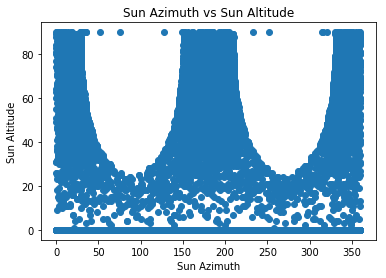

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(y='Sun Altitude',x='Sun Azimuth',data=solar_df)
plt.title('Sun Azimuth vs Sun Altitude')
plt.xlabel('Sun Azimuth')
plt.ylabel('Sun Altitude')
plt.show()

Another interesting Pattern now for the Sun altitude and Azimuth for the Solar Eclipses.

<b>Solar altitude</b> is the angle of the sun relative to the Earth's horizon, and is measured in degrees.The altitude is zero at sunrise and sunset, and can reach a maximum of 90 degrees (directly overhead) at noon at latitudes near the equator.

We can find a Fall-Rise-Fall pattern for the altitude for the increase in Sun Azimuth. But also we can see, there are some outlier High Sun Altitudes present for some Azimuth angles as well.

We can approximately find out the azimuth angles for which the Altitude stands highest in the two dropped patterns.

In [41]:
solar_df1 = solar_df.loc[solar_df['Sun Altitude']==90]

In [42]:
solar_df2 = solar_df1.loc[solar_df['Sun Azimuth']>50]

In [43]:
solar_df3 = solar_df2.loc[solar_df['Sun Azimuth']<150]

In [44]:
solar_df3

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
3444,3445,-559 July 20,04:40:58,18001,-31644,56,H,-0.0026,1.0006,22.3N,175.0W,90,76,2,00m04s
3533,3534,-523 February 15,17:32:29,17466,-31204,51,T,0.0013,1.0252,14.6S,5.8W,90,52,86,02m19s
6222,6223,613 January 26,18:31:59,4592,-17154,89,A,0.0030,0.9363,17.9S,74.9W,90,128,237,07m35s
10319,10320,2342 March 8,01:32:14,851,4232,145,T,0.0072,1.0511,4.9S,162.9E,90,149,169,04m16s


`Azimuth` of 52,76,128,149 are having Altitude of 90 degrees.

In [45]:
solar_df4 = solar_df1.loc[solar_df['Sun Azimuth']>225]

In [46]:
solar_df5 = solar_df4.loc[solar_df['Sun Azimuth']<325]

In [47]:
solar_df5

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
1168,1169,-1514 May 21,07:39:13,35386,-43458,23,T,-0.0042,1.0776,16.5N,149.6W,90,321,251,06m29s
2920,2921,-769 May 5,15:52:09,21328,-34244,45,T,-0.0033,1.0413,13.5N,29.4E,90,316,138,03m44s
4547,4548,-89 April 17,17:40:32,11460,-25834,66,T,-0.0015,1.0692,9.3N,37.7W,90,314,225,06m15s
6020,6021,533 November 2,14:15:16,5351,-18134,90,T,0.0028,1.0350,15.6S,15.0W,90,233,118,03m06s
8945,8946,1763 April 13,10:19:31,15,-2928,125,A,-0.0010,0.9455,9.0N,25.3E,90,252,201,06m11s


`Azimuth` of 252,233,314,316 and 321 are having Altitude of 90 degrees.

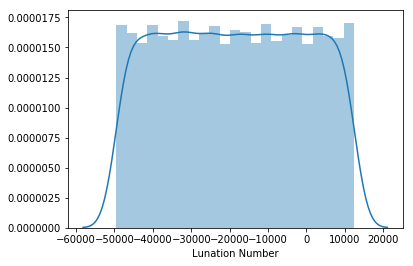

In [55]:
sns.distplot(solar_df['Lunation Number'])

#### Correlation Map

In [62]:
solar_df.describe()

,Delta T (s),Lunation Number,Saros Number,Gamma,Eclipse Magnitude,Sun Altitude,Sun Azimuth
count,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000
mean,12142.172802,-18546.959321,87.483190,-0.002469,0.812748,36.505295,180.264330
std,13583.402888,17906.572982,48.380284,0.900860,0.300398,32.417350,110.745408
min,-6.000000,-49456.000000,-13.000000,-1.569000,0.000000,0.000000,0.000000
25%,970.250000,-33954.750000,47.000000,-0.786575,0.675925,0.000000,89.000000
50%,5636.500000,-18495.000000,87.000000,-0.003850,0.950600,38.000000,180.000000
75%,20943.500000,-3039.250000,128.000000,0.776900,1.018400,66.000000,272.000000
max,46438.000000,12378.000000,190.000000,1.570600,1.081300,90.000000,360.000000


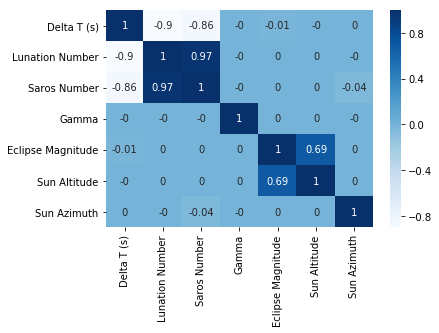

In [68]:
cols = ['Delta T (s)','Lunation Number','Saros Number','Gamma','Eclipse Magnitude','Sun Altitude','Sun Azimuth']
heatmap = sns.heatmap(round(solar_df[cols].corr(),2),annot=True,cmap='Blues')
plt.show()

We can see from the above heatmap that the Lunation Number is highly postively correlated with the Saros Number and at the same time highly negatively correlated with the Delta T seconds.<br> The high correlation between the Lunation Number and the Saros number indicates hence the naming of Saros Number sequences.
Because of this, we can go ahead and remove the Lunation Number feature from our dataset and proceed further.

#### Data Preparation and Cleaning

In [57]:
solar_df.tail(10)

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
11888,11889,2996 July 6,23:44:03,4395,12325,162,A,0.5013,0.9508,51.6N,145.6W,60,199,208,04m44s
11889,11890,2996 December 31,12:58:17,4399,12331,167,T,-0.1729,1.0249,32.9S,6.2E,80,349,86,02m14s
11890,11891,2997 June 26,03:41:44,4403,12337,172,A,-0.2793,0.9916,7.2N,141.9E,74,8,31,01m00s
11891,11892,2997 December 20,23:45:15,4406,12343,177,A,0.5449,0.9696,9.6N,161.9W,57,175,130,03m40s
11892,11893,2998 June 15,14:49:27,4410,12349,182,P,-1.0158,0.9792,66.5S,32.5W,0,9,NaN,NaN
11893,11894,2998 December 10,03:18:31,4414,12355,187,P,1.2838,0.4773,67.2N,145.0E,0,179,NaN,NaN
11894,11895,2999 May 6,23:23:57,4417,12360,154,T,0.8388,1.0566,71.5N,177.3E,33,146,345,03m25s
11895,11896,2999 October 30,09:34:33,4420,12366,159,A-,-1.0023,0.9586,70.9S,84.7W,0,137,-,-
11896,11897,3000 April 26,14:18:06,4424,12372,164,T,0.1310,1.0222,21.1N,18.4W,82,166,76,02m11s
11897,11898,3000 October 19,16:10:16,4428,12378,169,H,-0.2303,1.0049,23.1S,51.6W,77,16,17,00m29s


Catalog Number is nothing but a seriel number indicating the eclipse records. Hence we can go forward and drop this column.

In [59]:
solar_df.drop(['Catalog Number'],axis=1,inplace=True)

If you see the Lunation Number, these are numbers that are decreasing to zero and then increasing thereafter. Actually, Lunation is the time elapsed from one New Moon to the next and these would not be numbers of these magnitude.<br>Further we also saw the high correlation with the Saros Number field.<br>Hence we can frop this column as well.

In [69]:
solar_df.drop(['Lunation Number'],axis=1,inplace=True)

In [70]:
solar_df.head()

,Calendar Date,Eclipse Time,Delta T (s),Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,-1999 June 12,03:14:51,46438,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,-1999 December 5,23:45:23,46426,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,-1998 June 1,18:09:16,46415,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,-1998 November 25,05:57:03,46403,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,-1997 April 22,13:19:56,46393,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


#### Date-Time Field preparation

In [79]:
month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June': 6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [83]:
def date_change_function(x):
    x = x.split()
    x[1]=str(month_dict[x[1]])
    return x[0]+':'+x[1]+':'+x[2]

In [84]:
solar_df['Calendar Date'] = solar_df['Calendar Date'].apply(lambda x:date_change_function(x))

In [85]:
#Viewing the dataset after the month conversion
solar_df.head()

,Calendar Date,Eclipse Time,Delta T (s),Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,-1999:6:12,03:14:51,46438,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,-1999:12:5,23:45:23,46426,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,-1998:6:1,18:09:16,46415,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,-1998:11:25,05:57:03,46403,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,-1997:4:22,13:19:56,46393,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [86]:
solar_df['Time'] = solar_df.loc[:,['Calendar Date', 'Eclipse Time']].apply(lambda x: x[0]+':'+x[1], axis = 1)

In [87]:
solar_df.head()

,Calendar Date,Eclipse Time,Delta T (s),Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Time
0,-1999:6:12,03:14:51,46438,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s,-1999:6:12:03:14:51
1,-1999:12:5,23:45:23,46426,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s,-1999:12:5:23:45:23
2,-1998:6:1,18:09:16,46415,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s,-1998:6:1:18:09:16
3,-1998:11:25,05:57:03,46403,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s,-1998:11:25:05:57:03
4,-1997:4:22,13:19:56,46393,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN,-1997:4:22:13:19:56


We have succesfully converted the Calendar Date and Eclipse Time fields into a single field. Hence we can drop these existing columns.

In [89]:
solar_df.drop(['Calendar Date','Eclipse Time'],axis=1,inplace=True)

In [90]:
solar_df.head()

,Delta T (s),Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Time
0,46438,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s,-1999:6:12:03:14:51
1,46426,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s,-1999:12:5:23:45:23
2,46415,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s,-1998:6:1:18:09:16
3,46403,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s,-1998:11:25:05:57:03
4,46393,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN,-1997:4:22:13:19:56


In [91]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 12 columns):
Delta T (s)          11898 non-null int64
Saros Number         11898 non-null int64
Eclipse Type         11898 non-null object
Gamma                11898 non-null float64
Eclipse Magnitude    11898 non-null float64
Latitude             11898 non-null object
Longitude            11898 non-null object
Sun Altitude         11898 non-null int64
Sun Azimuth          11898 non-null int64
Path Width (km)      7698 non-null object
Central Duration     7698 non-null object
Time                 11898 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


### WORK IN PROGRESS!!!!!